In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [30]:
# load the dataset
column_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4','class']
feat_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']
data = pd.read_csv('EEG_Eye_State_no_outliers.csv', header=None)
data.columns = column_list

In [31]:
print("dimension of data: {}".format(data.shape))

dimension of data: (14304, 15)


In [32]:
print(data.groupby('class').size())

class
0.0    7855
1.0    6449
dtype: int64


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14304 entries, 0 to 14303
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AF3     14304 non-null  float64
 1   F7      14304 non-null  float64
 2   F3      14304 non-null  float64
 3   FC5     14304 non-null  float64
 4   T7      14304 non-null  float64
 5   P7      14304 non-null  float64
 6   O1      14304 non-null  float64
 7   O2      14304 non-null  float64
 8   P8      14304 non-null  float64
 9   T8      14304 non-null  float64
 10  FC6     14304 non-null  float64
 11  F4      14304 non-null  float64
 12  F8      14304 non-null  float64
 13  AF4     14304 non-null  float64
 14  class   14304 non-null  float64
dtypes: float64(15)
memory usage: 1.6 MB


array([[<AxesSubplot:title={'center':'AF3'}>,
        <AxesSubplot:title={'center':'F7'}>,
        <AxesSubplot:title={'center':'F3'}>],
       [<AxesSubplot:title={'center':'FC5'}>,
        <AxesSubplot:title={'center':'T7'}>,
        <AxesSubplot:title={'center':'P7'}>],
       [<AxesSubplot:title={'center':'O1'}>,
        <AxesSubplot:title={'center':'O2'}>,
        <AxesSubplot:title={'center':'P8'}>],
       [<AxesSubplot:title={'center':'T8'}>,
        <AxesSubplot:title={'center':'FC6'}>,
        <AxesSubplot:title={'center':'F4'}>],
       [<AxesSubplot:title={'center':'F8'}>,
        <AxesSubplot:title={'center':'AF4'}>, <AxesSubplot:>]],
      dtype=object)

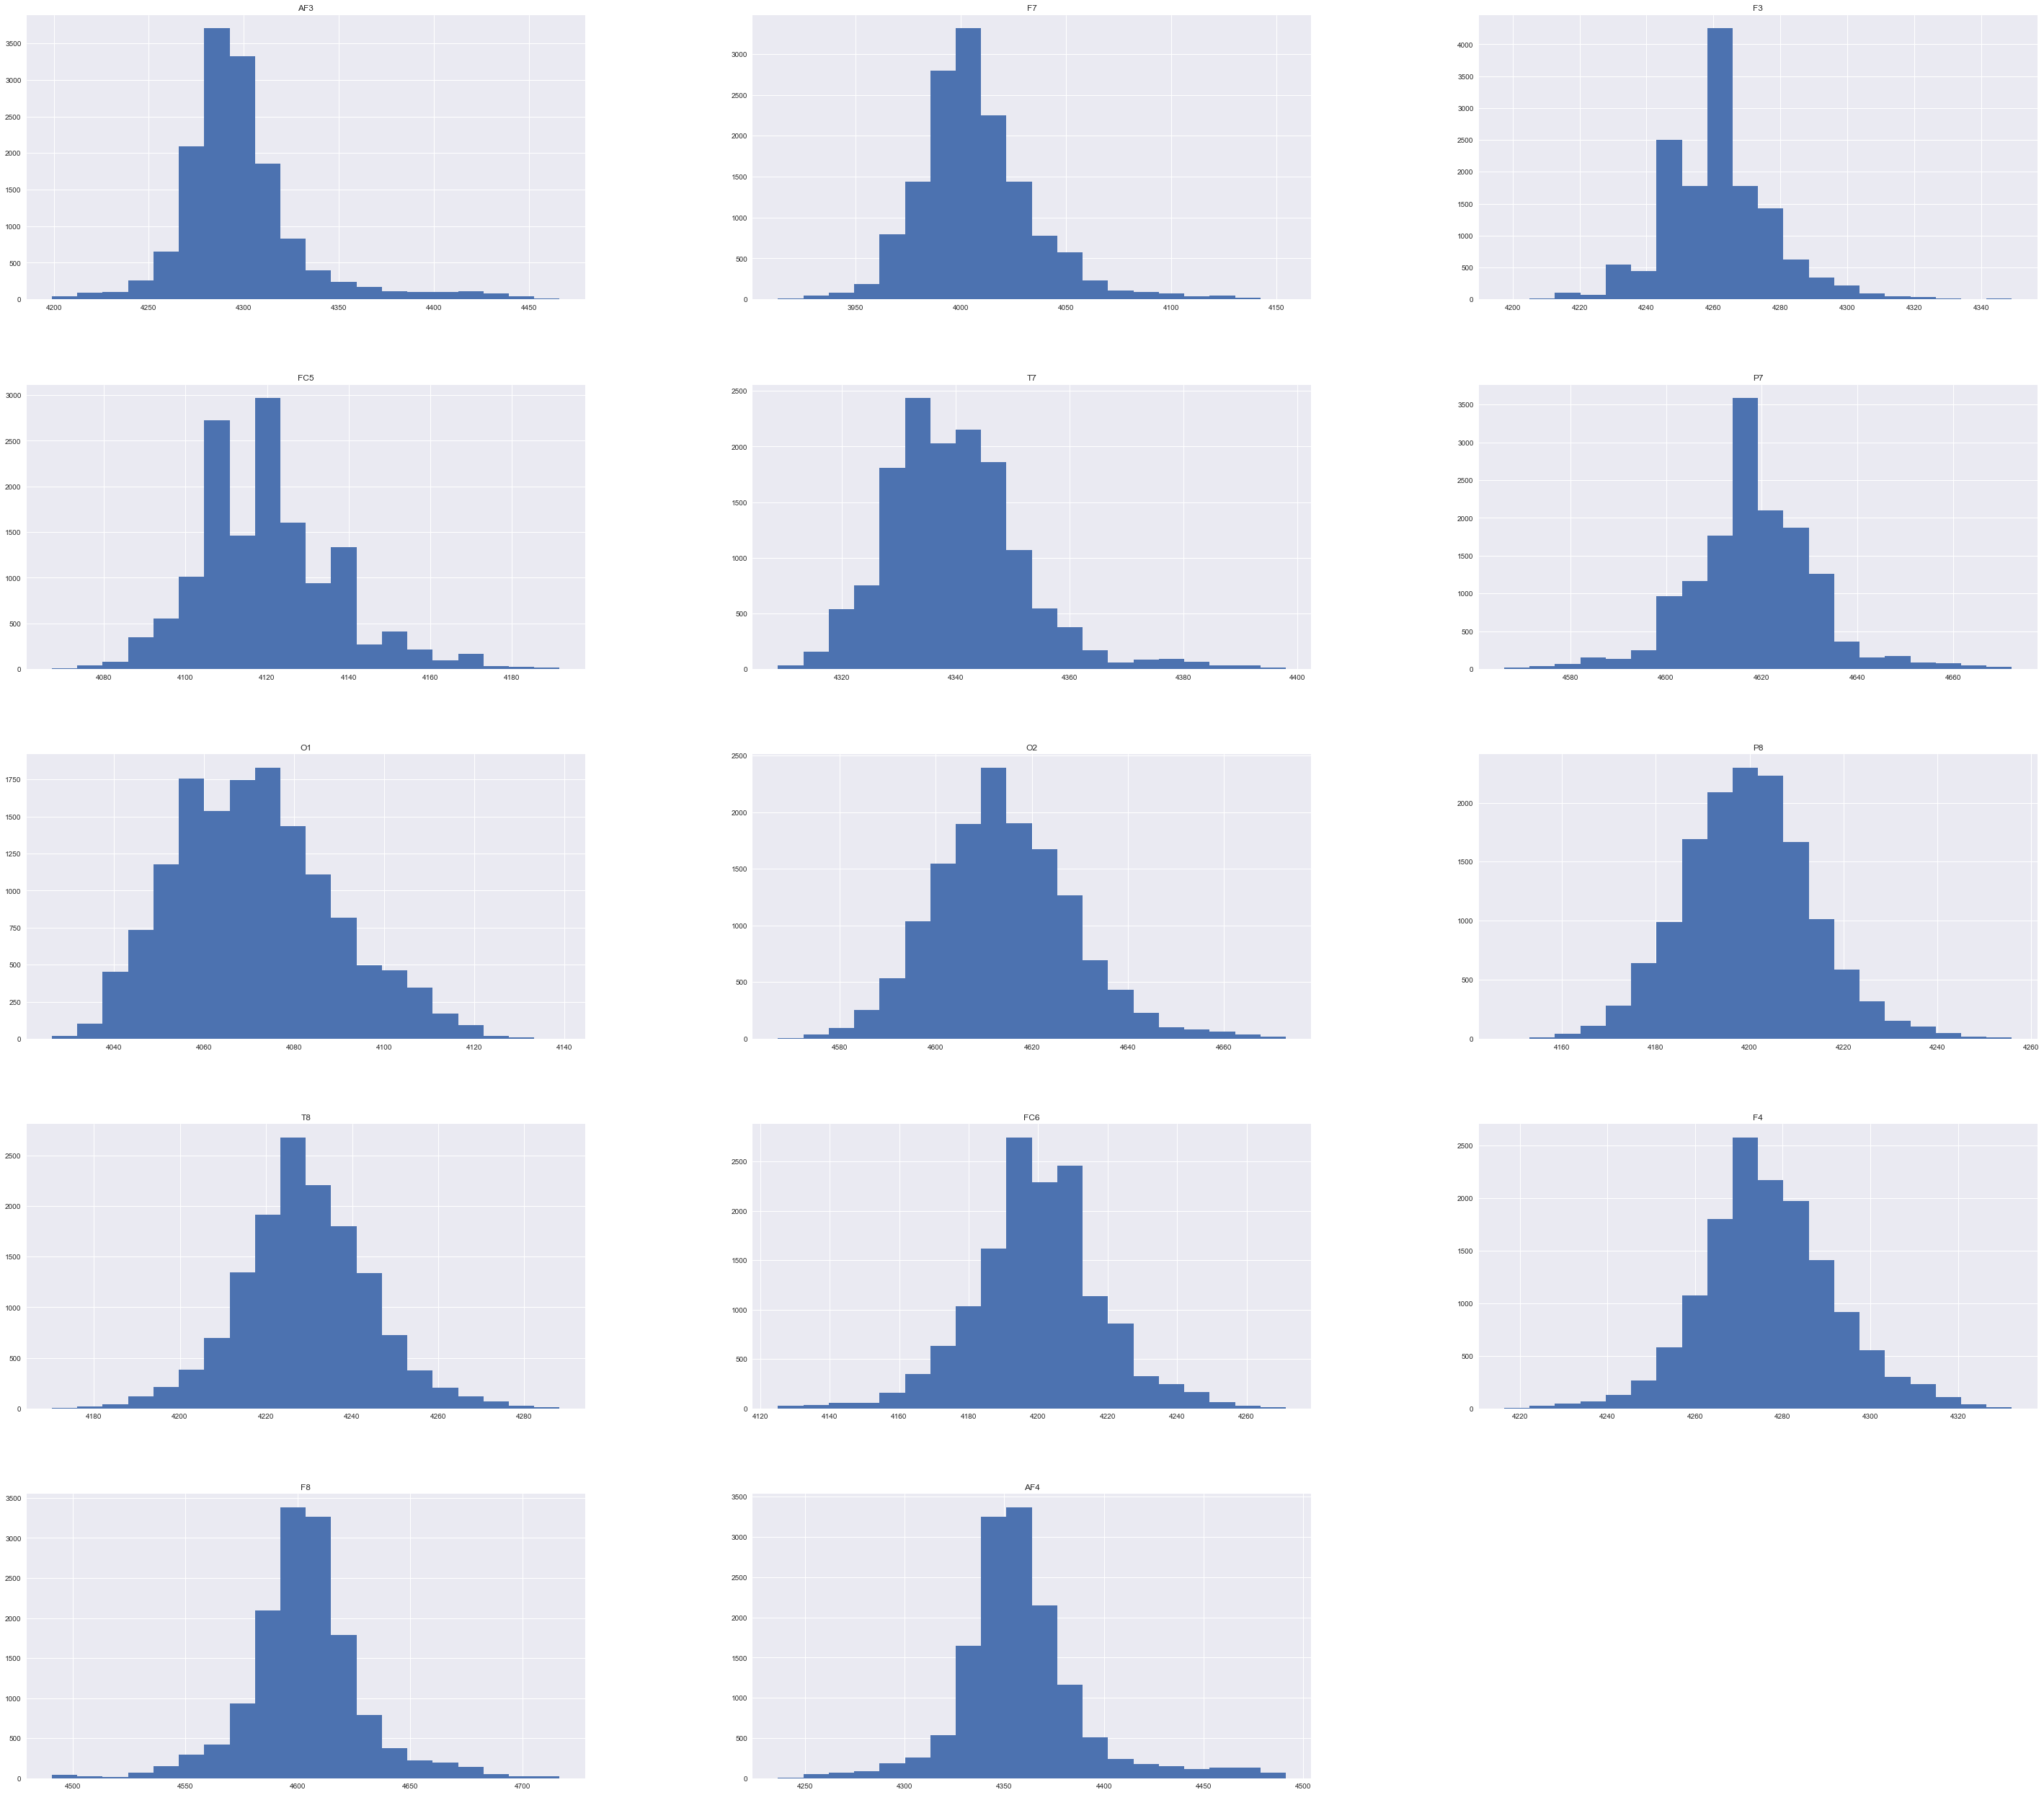

In [34]:
data[feat_list].hist(bins=20,layout=(5, 3), figsize=(50, 45))

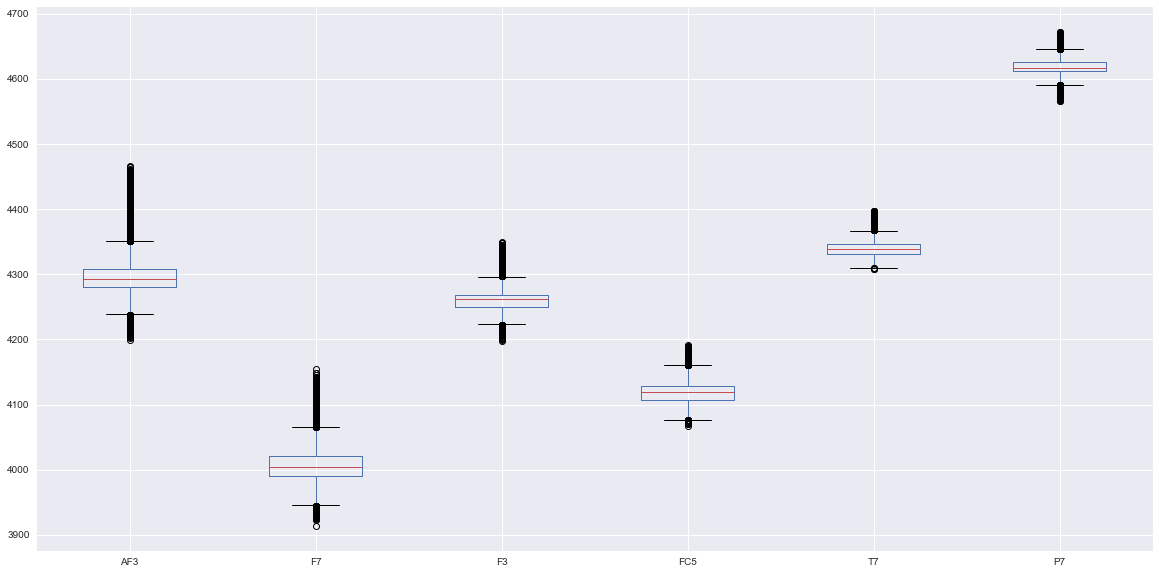

In [35]:
plt.figure(figsize=(20,10))
boxplot = data.boxplot(column=feat_list[0:6])

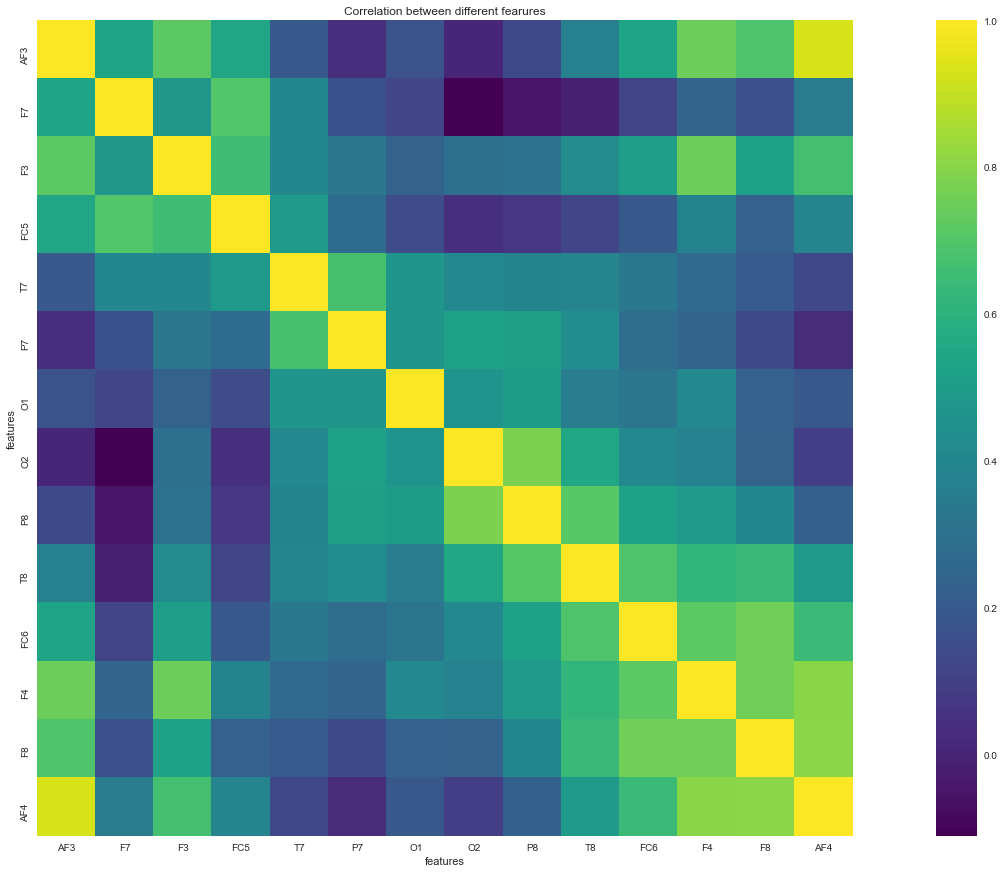

In [36]:
def correlation_heatmap(dataframe,l,w):
    #correlations = dataframe.corr()
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=False,cmap='viridis')
    plt.title('Correlation between different fearures')
    plt.xlabel('features')
    plt.ylabel('features')
    plt.savefig('cor1.png')
    plt.show();

#print("After Dropping: ", cleandf)
correlation_heatmap(data[feat_list], 30,15)

In [37]:
#It is clear that there are less features that are correlated to each other and moreover, they are correlated around 0.8-0.9, remaining all are correlated less than 0.0-0.6

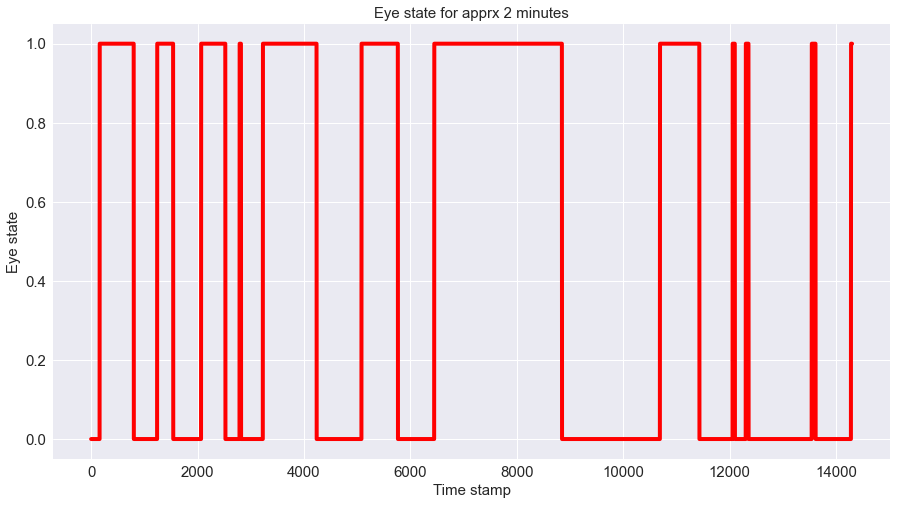

In [38]:
plt.figure(figsize=(15,8))
data['class'].plot(linestyle='solid',color='red',linewidth=4)
plt.title('Eye state for apprx 2 minutes',size='15')
plt.xlabel('Time stamp',size='15')
plt.ylabel('Eye state',size='15')
plt.xticks(size='15')
plt.yticks(size='15')
plt.show()

In [39]:
correlation = data.corr()
eigen_vals, eigen_vecs = np.linalg.eigh(correlation)
print('\nEigenvalues: \n%s' % eigen_vals)


Eigenvalues: 
[0.0370309  0.11736665 0.14574082 0.16513715 0.2131227  0.23141719
 0.27373483 0.3138668  0.40773111 0.56495192 0.6532737  0.93695845
 1.9750252  2.6280298  6.33661279]


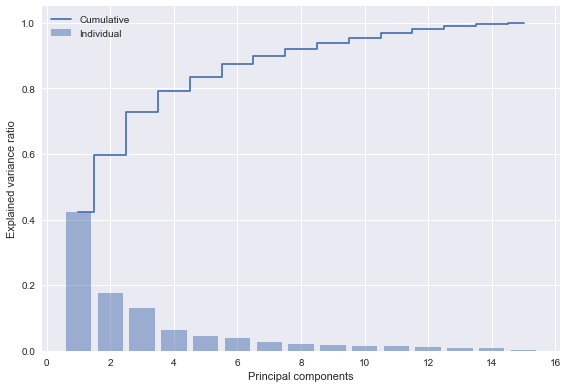

In [40]:
tot = sum(np.abs(eigen_vals))
var_exp = [(i / tot) for i in sorted(np.abs(eigen_vals), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha=0.5, align='center',label='Individual')
plt.step(range(1, eigen_vals.size + 1), cum_var_exp, where='mid',label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('pcao.png')
plt.show()

In [41]:
cum_var_exp

array([0.42244085, 0.59764284, 0.72931119, 0.79177508, 0.83532666,
       0.87299012, 0.9001722 , 0.92109665, 0.93934564, 0.95477345,
       0.96898163, 0.97999078, 0.98970683, 0.99753127, 1.        ])

In [42]:
X = data.drop('class', 1)
y = data['class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
X_train.shape

(11443, 10)

In [44]:
svc = SVC(kernel='rbf',C=50,gamma='auto',probability=True)
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.97
Accuracy on test set: 0.94


In [45]:
def roc_calc(model,X_test,y_test,name):
    pred_prob = svc.predict_proba(X_test)
    # auc scores
    auc_score1 = roc_auc_score(y_test, pred_prob[:,1])
    print('accuracy score is: ' + str(auc_score1))
    # roc curve for models
    fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')
    plt.savefig('roc'+str(name) + '.png')
    plt.show();

accuracy score is: 0.9837222708762742


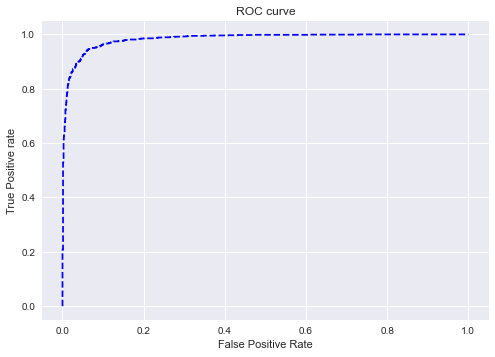

In [46]:
roc_calc(svc,X_test,y_test,"outsvmc100")

Precision  0.94
Recall 0.92


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x396 with 0 Axes>

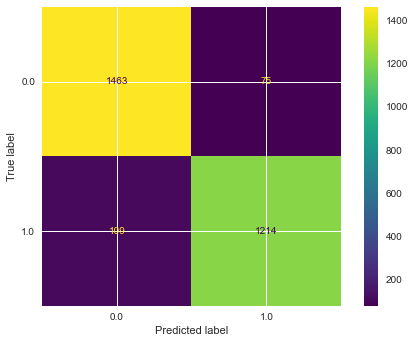

In [47]:
prediction=svc.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(svc, X_test, y_test)
plt.savefig('cmoutsvmc100.png')
plt.show()

In [48]:
#UN-COMMENT BELOW LINE TO SEE RESULTS WITHOUT PCA
#X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'class'], data['class'], stratify=data['class'], random_state=66)

In [49]:
X_train.shape, X_test.shape

((10728, 14), (3576, 14))

In [50]:
#Linear Discriminant Analysis (LDA)


In [51]:

ldam=LinearDiscriminantAnalysis()
ldam.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(ldam.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(ldam.score(X_test, y_test)))

Accuracy on training set: 0.64
Accuracy on test set: 0.64


In [52]:
#Quadratic Discriminant Analysis (QDA)

In [53]:
qdam=QuadraticDiscriminantAnalysis()
qdam.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(qdam.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(qdam.score(X_test, y_test)))

Accuracy on training set: 0.80
Accuracy on test set: 0.79


In [54]:
#Support vector machine (SVM)


In [55]:
svc = SVC(kernel='rbf',C=1, decision_function_shape='ovo')
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.61
Accuracy on test set: 0.60


In [56]:
svc = SVC(kernel='poly',degree=3,C=1, decision_function_shape='ovo')
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.65
Accuracy on test set: 0.65
